In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'C:\\Users\\Daniel Beck\\Documents\\University\\AAA_ESADE\\Artificial_Intelligence\\AI Prep Course'

In [3]:
machines = pd.read_csv("./Datasets/machine_data.csv")
failures = pd.read_csv("./Datasets/machine_failures.csv")
transactions = pd.read_csv("./Datasets/transactional_data.csv")
products = pd.read_csv("./Datasets/product_data.csv")

In [4]:
# inspect the datasets
machines.head()

,machine,location_type,num_vendex_nearby_300,train_AvgDailyPassengers,train_AvgWorkingDayPassengers,n_density_5km,income_average,total_number_of_routes_600,num_hotels,num_hotels_45,small_machine
0,1,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0
1,2,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0
2,179,others,0,NaN,NaN,358.915033,51962.0,6.0,0,0,1
3,180,transport,2,NaN,NaN,253.528265,47359.0,11.0,0,0,1
4,181,others,0,NaN,NaN,197.552083,61219.0,10.0,0,0,0


In [5]:
failures.head()

,machine,column,timestamp,failure
0,1,50,2017-01-23 15:29:36,1
1,1,55,2017-01-28 11:14:06,1
2,1,33,2017-02-13 14:16:34,1
3,1,43,2017-02-27 09:14:18,1
4,1,47,2017-03-21 09:24:19,1


In [6]:
transactions.head()

,machine,timestamp,date,column,product_name
0,1,2017-01-04 14:02:34,2017-01-04,55,water_(sparkling)_1
1,1,2017-01-02 15:00:20,2017-01-02,55,water_(sparkling)_1
2,1,2017-01-02 14:35:57,2017-01-02,56,water_(sparkling)_1
3,1,2017-01-13 14:01:38,2017-01-13,56,water_(sparkling)_1
4,1,2017-01-11 13:34:12,2017-01-11,56,water_(sparkling)_1


In [7]:
products.head()

,product_name,category,type_drink_snack,price,cost,tax_rate
0,water_(sparkling)_1,Water,drink,2.8,0.2,0.1
1,water_(still)_1,Water,drink,3.4,0.2,0.1
2,milk_and_milk-based_2,Milk based,drink,2.6,1.2,0.1
3,milk_and_milk-based_3,Milk based,drink,4.4,0.8,0.1
4,crisps_3,Salty,snack,1.8,1.0,0.1


In [8]:
# How many machines are there?
n_machines = np.unique(machines.machine, return_counts=True)
df = pd.DataFrame(n_machines).T
df[0].count()

2495

In [9]:
test1 = machines.machine.unique()
len(test1)

2495

In [10]:
# What percentage of machines are small?
df2 = pd.DataFrame(machines[["machine", "small_machine"]])
print(df2.shape)
small_percent = (df2["small_machine"].sum()/2495)*100
print(f'the percentage of machines that is small is: {small_percent}%')

(2495, 2)
the percentage of machines that is small is: 38.436873747494985%


In [11]:
# How do they distribute in terms of location type i.e. transport, petrol station? 
import seaborn as sns
from matplotlib import pyplot as plt

df3 = pd.DataFrame(machines[["machine", "small_machine", "location_type"]])
sns.catplot(x="location_type", kind="count", hue="small_machine", data=df3);
plt.show()

<Figure size 614.736x500 with 1 Axes>

In [12]:
# analyse the products dataset
# how many products are there?

products.head()

print(f' There are {len(products.product_name.unique())} products across our machines!')

 There are 63 products across our machines!


,product_name
category,
Carbonates and energy drinks,13
Chocolate based,11
"Cookies, pastries and cereals",7
"Juice, tea and smoothies",8
Milk based,4
Salty,8
Sugar candy,7
Water,5


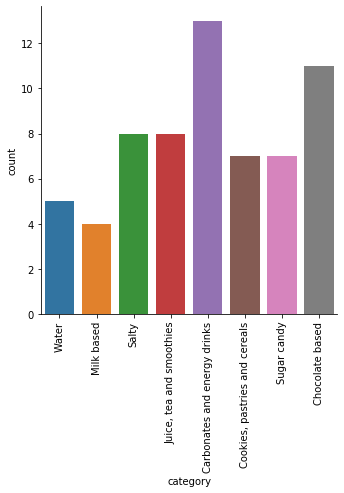

In [13]:
# which category has the highest number of products?

df4 = products[["category", "product_name" ]]
df4.head()

pivot1 = pd.pivot_table(df4, values = "product_name", index = "category", aggfunc=len)

chart = sns.catplot(x= "category", kind="count", data=df4).set_xticklabels(rotation=90)
pivot1

In [14]:
# Which category has the highest and lowest average price? And within snacks or drinks? 
pivot2 = pd.pivot_table(products, values = "price", index = ["type_drink_snack","category"])

pivot2

price
type_drink_snack category                               
drink            Carbonates and energy drinks   3.261538
                 Juice, tea and smoothies       2.862500
                 Milk based                     3.425000
                 Water                          3.260000
snack            Chocolate based                2.309091
                 Cookies, pastries and cereals  2.385714
                 Salty                          2.725000
                 Sugar candy                    2.300000

In [15]:
# Transactional Data Exploration
transactions.head()

,machine,timestamp,date,column,product_name
0,1,2017-01-04 14:02:34,2017-01-04,55,water_(sparkling)_1
1,1,2017-01-02 15:00:20,2017-01-02,55,water_(sparkling)_1
2,1,2017-01-02 14:35:57,2017-01-02,56,water_(sparkling)_1
3,1,2017-01-13 14:01:38,2017-01-13,56,water_(sparkling)_1
4,1,2017-01-11 13:34:12,2017-01-11,56,water_(sparkling)_1


In [16]:
backup = transactions

In [17]:
# Restricting the transactional data to March 2017, what’s the average daily items among small and big machines?. 
# Why do you think there is such a difference? 
# Give at least 2 possible reasons. 

# Note: To calculate daily sales consider only the “active days” of a machine to exclude machine failures. 
# For that, divide the number of items sold by a machine by the total number of “distinct” days

from datetime import datetime
transactions["date"] = [datetime.strptime(elem, "%Y-%m-%d") for elem in transactions["date"]]

In [18]:
transactions["timestamp"] = [datetime.strptime(elem, "%Y-%m-%d %H:%M:%S") for elem in transactions["timestamp"]]
transactions.head()

,machine,timestamp,date,column,product_name
0,1,2017-01-04 14:02:34,2017-01-04,55,water_(sparkling)_1
1,1,2017-01-02 15:00:20,2017-01-02,55,water_(sparkling)_1
2,1,2017-01-02 14:35:57,2017-01-02,56,water_(sparkling)_1
3,1,2017-01-13 14:01:38,2017-01-13,56,water_(sparkling)_1
4,1,2017-01-11 13:34:12,2017-01-11,56,water_(sparkling)_1


In [19]:
# limit the observations to only march 2017
march_2017 = transactions[transactions["date"].dt.month == 3]
march_2017 = march_2017[march_2017["date"].dt.year == 2017]
march_2017.head()

,machine,timestamp,date,column,product_name
28,1,2017-03-05 16:23:26,2017-03-05,56,water_(sparkling)_1
29,1,2017-03-05 16:22:43,2017-03-05,55,water_(sparkling)_1
30,1,2017-03-05 13:35:57,2017-03-05,55,water_(sparkling)_1
31,1,2017-03-05 12:56:55,2017-03-05,56,water_(sparkling)_1
32,1,2017-03-12 15:38:56,2017-03-12,56,water_(sparkling)_1


In [20]:
#confirm that it has been split correctly
print(march_2017.timestamp.min())
print(march_2017.timestamp.max())

2017-03-01 00:00:01
2017-03-31 23:59:53


In [26]:
pd.set_option('display.max_columns', None)
march_2017.head()

,machine,timestamp,date,column,product_name,location_type_x,num_vendex_nearby_300_x,train_AvgDailyPassengers_x,train_AvgWorkingDayPassengers_x,n_density_5km_x,income_average_x,total_number_of_routes_600_x,num_hotels_x,num_hotels_45_x,small_machine_x,location_type_y,num_vendex_nearby_300_y,train_AvgDailyPassengers_y,train_AvgWorkingDayPassengers_y,n_density_5km_y,income_average_y,total_number_of_routes_600_y,num_hotels_y,num_hotels_45_y,small_machine_y
0,1,2017-03-05 16:23:26,2017-03-05,56,water_(sparkling)_1,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0
1,1,2017-03-05 16:22:43,2017-03-05,55,water_(sparkling)_1,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0
2,1,2017-03-05 13:35:57,2017-03-05,55,water_(sparkling)_1,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0
3,1,2017-03-05 12:56:55,2017-03-05,56,water_(sparkling)_1,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0
4,1,2017-03-12 15:38:56,2017-03-12,56,water_(sparkling)_1,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0


In [27]:
# what’s the average daily items among small and big machines?


#merge machine data with transactions
march_2017 = pd.merge(left=march_2017, right=machines, how ="left", left_on="machine", right_on="machine")

small = march_2017[march_2017["small_machine_x"]==1]
big = march_2017[march_2017["small_machine_x"]==0]

In [28]:
# daily average when considering all the possible days
small_daily_avg = small.groupby(["machine"]).agg("count")/small.groupby(["machine", "date"]).agg("count")
small_daily_avg= small_daily_avg.timestamp.mean()
print(small_daily_avg)

big_daily_avg = big.groupby(["machine"]).agg("count")
big_daily_avg= big_daily_avg.timestamp.mean()
print(big_daily_avg)

43.092759329899785
295.98828125


In [29]:
march_2017.head()

,machine,timestamp,date,column,product_name,location_type_x,num_vendex_nearby_300_x,train_AvgDailyPassengers_x,train_AvgWorkingDayPassengers_x,n_density_5km_x,income_average_x,total_number_of_routes_600_x,num_hotels_x,num_hotels_45_x,small_machine_x,location_type_y,num_vendex_nearby_300_y,train_AvgDailyPassengers_y,train_AvgWorkingDayPassengers_y,n_density_5km_y,income_average_y,total_number_of_routes_600_y,num_hotels_y,num_hotels_45_y,small_machine_y,location_type,num_vendex_nearby_300,train_AvgDailyPassengers,train_AvgWorkingDayPassengers,n_density_5km,income_average,total_number_of_routes_600,num_hotels,num_hotels_45,small_machine
0,1,2017-03-05 16:23:26,2017-03-05,56,water_(sparkling)_1,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0
1,1,2017-03-05 16:22:43,2017-03-05,55,water_(sparkling)_1,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0
2,1,2017-03-05 13:35:57,2017-03-05,55,water_(sparkling)_1,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0
3,1,2017-03-05 12:56:55,2017-03-05,56,water_(sparkling)_1,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0
4,1,2017-03-12 15:38:56,2017-03-12,56,water_(sparkling)_1,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0,others,1,NaN,NaN,224.704403,NaN,65.0,0,0,0


In [30]:
small.groupby("machine").date.unique().index

Int64Index([ 179,  180,  183,  185,  187,  188,  189,  191,  194,  198,
            ...
            2689, 2691, 2696, 2700, 2702, 2703, 2707, 2708, 2718, 2722],
           dtype='int64', name='machine', length=958)

In [31]:
# daily average when  considering only the active days

days = [len(row) for row in small.groupby("machine").date.unique()]
sales = [len(row) for row in small.groupby("machine").timestamp.unique()]
machine = small.groupby("machine").date.unique().index

avg_small= pd.DataFrame([days, sales, machine]).transpose()

In [32]:
avg_small.columns = ["days", "sales", "machine"]
avg_small["avg_daily"] = avg_small.sales/avg_small.days
avg_small.avg_daily.mean()

7.70925057100557

In [33]:
days2 = [len(row) for row in big.groupby("machine").date.unique()]
sales2 = [len(row) for row in big.groupby("machine").timestamp.unique()]
machine2 = big.groupby("machine").date.unique().index

avg_big = pd.DataFrame([days2, sales2, machine2]).transpose()

avg_big.columns = ["days", "sales", "machine"]
avg_big["avg_daily"] = avg_big.sales/avg_big.days
avg_big.avg_daily.mean()

9.89770933094889

In [34]:
products.head()

,product_name,category,type_drink_snack,price,cost,tax_rate
0,water_(sparkling)_1,Water,drink,2.8,0.2,0.1
1,water_(still)_1,Water,drink,3.4,0.2,0.1
2,milk_and_milk-based_2,Milk based,drink,2.6,1.2,0.1
3,milk_and_milk-based_3,Milk based,drink,4.4,0.8,0.1
4,crisps_3,Salty,snack,1.8,1.0,0.1


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

data1 = pd.merge(left=transactions, right=machines, how ="left", left_on="machine", right_on="machine")
data = pd.merge(left= data1, right=products, how="left", on="product_name")

machinedata= data[["timestamp", "machine", "type_drink_snack", "date"]]

In [36]:
#  what is the median number of hotels in the machine area? 
machines.agg("median")["num_hotels"]

0.0

In [ ]:
############################################################
# LETS PRACTICE PLOTTING A BIT
############################################################


# the number of machines in each area
machines.head()

machines.groupby("location_type").agg("count")["machine"].plot(kind="bar")

In [113]:
# number of sales per machine per day by type_drink_snack
machines.head()
transactions.head()
df = pd.DataFrame(pd.merge(left=transactions, right=products, on="product_name"))
df.head()

# number of sales per day per machine
# pivot1 = pd.pivot_table(df4, values = "product_name", index = "category", aggfunc=len)

df2 = pd.pivot_table(df, index= ["machine", "date", "type_drink_snack"], values = "timestamp", aggfunc=len)
df3 = pd.DataFrame(df2.to_records())
df4 = df3[df3["type_drink_snack"]=="drink"].groupby("machine").agg("mean")
df5 = df3[df3["type_drink_snack"]=="snack"].groupby("machine").agg("mean")

In [114]:
df3 = df3.groupby(["date", "type_drink_snack"]).mean()
df3 = pd.DataFrame(df3.to_records()).drop("machine", 1)

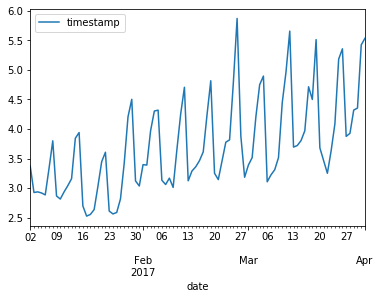

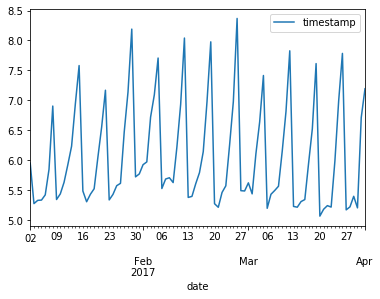

In [131]:
df3[df3["type_drink_snack"]=="drink"].plot(x="date", y="timestamp")
df3[df3["type_drink_snack"]=="snack"].plot(x="date", y="timestamp")

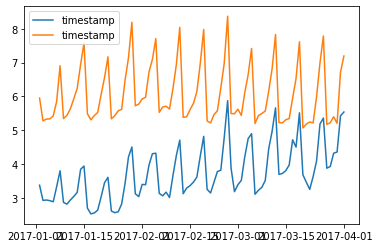

In [132]:
dr = df3[df3["type_drink_snack"]=="drink"]
sn = df3[df3["type_drink_snack"]=="snack"]

plt.plot("date", "timestamp" ,data=dr)
plt.plot("date", "timestamp" ,data=sn)
plt.legend(loc='best')
plt.show()

0.0